In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
%matplotlib inline
from IPython.display import display

In [2]:
data_export = pd.read_csv("Dataset/india-trade-data/2018-2010_export.csv")
data_import = pd.read_csv("Dataset/india-trade-data/2018-2010_import.csv")
data_export = data_export[data_export.year==2018]
data_import = data_import[data_import.year==2018]
print(data_export.shape, data_import.shape)

(15886, 5) (8647, 5)


In [3]:
exported = data_export.groupby('Commodity').agg({'value':'sum','country':'nunique'})
imported = data_import.groupby('Commodity').agg({'value':'sum','country':'nunique'})
top_exports = exported.sort_values('value', ascending=False)[:10]
top_imports = imported.sort_values('value', ascending=False)[:10]

#Number of items that were common in lists of top 10 import and export
print(len(set(top_exports.index).intersection(set(top_imports.index))))

6


<div class="alert alert-success">

<b>Commodities Common In Both Top Imports & Top Exports</b>:

<ul>
  <li> Commodities occuring in total in both of top_exports, top_imports.</li>
    <li> Plotting the deficit/surpluses of these commodities</li>
</ul>
 
</div>

Commodities in Total in Both of top_exports, top_imports :  6


,Commodity,value_exp,country_exp,value_imp,country_imp,surplus
0,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",47920.23,178,167871.78,134,-119951.55
1,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",40449.05,201,64720.19,132,-24271.14
2,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",20963.32,224,43839.43,194,-22876.11
3,ORGANIC CHEMICALS,18238.53,197,22389.41,128,-4150.88
4,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,12726.63,224,52048.26,197,-39321.63
5,IRON AND STEEL,9741.67,185,12582.09,166,-2840.42


AxesSubplot(0.125,0.125;0.775x0.755)


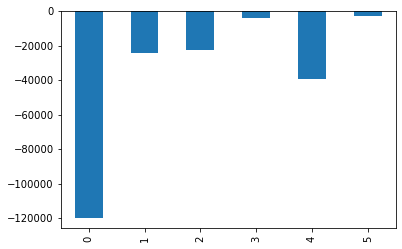

In [4]:
commons = pd.merge(top_exports.reset_index(), 
         top_imports.reset_index(), 
         how='inner', on=['Commodity'],
         suffixes=('_exp', '_imp'))

commons['surplus'] = commons['value_exp'] - commons['value_imp']
print("Commodities in Total in Both of top_exports, top_imports : ", len(commons))
display(commons.head(n=6))
print(commons['surplus'].plot.bar())

<div class="alert alert-success">

<b>A Better Way To Define Top Imports & Top Exports</b>:
    
</div>

In [5]:
# A better way to define top imported and exported items can be to find the total value imported or exported and 
# divide that value by the number of countries that were involved in that product's import or export.
# This gives a better idea than just adding the values as all products are not imported or exported by all countries.
# So using a average of the value based on number of countries it's imported or exported from seems a better approach.

print("Top Exports")
top_exp = data_export.groupby(["Commodity"]).agg({'value':'sum','country':'nunique'})
top_exp["Value/Countries"] = top_exp['value']/top_exp['country']
top_exp = top_exp.sort_values('Value/Countries', ascending=False)[:10]
print("\n\n", top_exp[["Value/Countries"]])

print("\n\nTop Imports")
top_imp = data_import.groupby(["Commodity"]).agg({'value':'sum','country':'nunique'})
top_imp["Value/Countries"] = top_imp['value']/top_imp['country']
top_imp = top_imp.sort_values('Value/Countries', ascending=False)[:10]
print("\n\n", top_imp[["Value/Countries"]])

Top Exports


                                                     Value/Countries
Commodity                                                          
MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THE...       269.214775
NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPREC...       201.239055
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...        93.586250
ORGANIC CHEMICALS                                         92.581371
VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING ...        85.763033
SHIPS, BOATS AND FLOATING STRUCTURES.                     78.076986
PHARMACEUTICAL PRODUCTS                                   68.620419
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS TH...        56.815313
IRON AND STEEL                                            52.657676
CEREALS.                                                  46.364091


Top Imports


                                                     Value/Countries
Commodity                                                          
MINERAL FUELS, M

<div class="alert alert-success">

<b>Plotting Top Imports & Exports</b>:

<ul>
  <li>Plotting the deficits/surpluses for top exported/imported commodities.</li>
</ul>
 
    
</div>

In [6]:
# Merging Top imports and exports for finding deficits/surpluses.

commonItems = pd.merge(top_exp.reset_index(), 
         top_imp.reset_index(), 
         how='inner', on=['Commodity'],
         suffixes=('_exp', '_imp'))

commonItems['surplus'] = commonItems['value_exp'] - commonItems['value_imp']
print("Commodities in Total in Both of top_exports, top_imports : ", len(commonItems))
fig = px.bar(commonItems, y="surplus", hover_data=["value_exp", "value_imp"])
fig.show()

Commodities in Total in Both of top_exports, top_imports :  6


<div class="alert alert-success">

<b>Trade Deficit</b>:

<ul>
  <li> For the top 10 imported commodities, fidning the trade deficits</li>
</ul>
 
</div>

In [7]:
top_exp_all = data_export.groupby(["Commodity"]).agg({'value':'sum','country':'nunique'})
top_exp_all = top_exp_all.sort_values('value', ascending=False)
top_imp_10 = data_import.groupby(["Commodity"]).agg({'value':'sum','country':'nunique'})
top_imp_10 = top_imp_10.sort_values('value', ascending=False)[:10]
top10Imp = pd.merge(top_imp_10.reset_index(), 
         top_exp_all.reset_index(), 
         how='right', on=['Commodity'],
         suffixes=('_imp', '_exp'))
top10Imp["Trade Deficit"] = top10Imp["value_exp"] - top10Imp["value_imp"]
display(top10Imp.head(n=10))

,Commodity,value_imp,country_imp,value_exp,country_exp,Trade Deficit
0,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",167871.78,134.0,47920.23,178,-119951.55
1,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",64720.19,132.0,40449.05,201,-24271.14
2,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,52048.26,197.0,12726.63,224,-39321.63
3,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",43839.43,194.0,20963.32,224,-22876.11
4,ORGANIC CHEMICALS,22389.41,128.0,18238.53,197,-4150.88
5,PLASTIC AND ARTICLES THEREOF.,15246.55,173.0,8014.30,213,-7232.25
6,IRON AND STEEL,12582.09,166.0,9741.67,185,-2840.42
7,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,9994.44,74.0,1097.47,171,-8896.97
8,"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURIN...",9630.98,163.0,3255.46,218,-6375.52
9,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,7624.43,114.0,2011.31,187,-5613.12


<div class="alert alert-success">

<b>What Dollar Value Was Imported for Each Country-Commodity Pair</b>:

</div>

In [8]:
df_country_commodity_pair = data_import.groupby(["country", 'Commodity']).agg({'value':'sum'})
display(df_country_commodity_pair)

value
country         Commodity                                                
AFGHANISTAN TIS ARTICLES OF STONE, PLASTER, CEMENT, ASBESTOS, M...   0.01
                CARPETS AND OTHER TEXTILE FLOOR COVERINGS.           0.02
                COFFEE, TEA, MATE AND SPICES.                       35.48
                COPPER AND ARTICLES THEREOF.                         0.36
                COTTON.                                              0.01
...                                                                   ...
ZIMBABWE        RUBBER AND ARTICLES THEREOF.                         0.00
                SALT; SULPHUR; EARTHS AND STONE; PLASTERING MAT...   0.14
                TANNING OR DYEING EXTRACTS; TANNINS AND THEIR D...   0.62
                TOBACCO AND MANUFACTURED TOBACCO SUBSTITUTES.        4.97
                WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.            0.00

[8647 rows x 1 columns]

<div class="alert alert-success">

<b>For the Top 10 Imported Commodities, Finding the Top 3 Countries They are Imported From</b>:

</div>

In [9]:
country_commodity = data_import.groupby(['country','Commodity']).agg({'value':'sum'}).reset_index()

top10imp_3countries = pd.merge(top_imports.reset_index().rename(columns={'country':'n_ctries'}), 
                            country_commodity.rename(columns={'value':'country_value'}), 
                            how='left', on=['Commodity'])
top10imp_3countries = top10imp_3countries.sort_values(['Commodity','country_value'], ascending=[True,False]).groupby('Commodity').head(3)
display(top10imp_3countries.head(n=30))

,Commodity,value,n_ctries,country,country_value
1152,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,9994.44,74,INDONESIA,3440.97
1195,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,9994.44,74,UKRAINE,1894.95
1124,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,9994.44,74,ARGENTINA,1720.46
305,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,52048.26,197,CHINA P RP,20627.56
347,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,52048.26,197,HONG KONG,8657.63
458,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,52048.26,197,VIETNAM SOC REP,3679.53
1379,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,7624.43,114,CHINA P RP,1050.23
1425,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,7624.43,114,MOROCCO,707.70
1363,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,7624.43,114,AUSTRALIA,664.48
1037,IRON AND STEEL,12582.09,166,KOREA RP,2684.66


<div class="alert alert-success">

<b>Fiscal Deficits</b>:

<ul>
  <li> For the country commodity pairs in top imports, finding out the fiscal deficits for the year 2018</li>
</ul>
</div>

In [10]:
country_commodity_export = data_export.groupby(['country','Commodity']).agg({'value':'sum'}).reset_index()

top_exports_wcs = pd.merge(top_exports.reset_index().rename(columns={'country':'n_ctries'}), 
                            country_commodity_export.rename(columns={'value':'country_value'}), 
                            how='left', on=['Commodity'])

country_commodity_import = data_import.groupby(['country','Commodity']).agg({'value':'sum'}).reset_index()
top_imports_wcs = pd.merge(top_imports.reset_index().rename(columns={'country':'n_ctries'}), 
                            country_commodity_import.rename(columns={'value':'country_value'}), 
                            how='left', on=['Commodity'])

top_imports_w3cs = top_imports_wcs.sort_values(['Commodity','country_value'], ascending=[True,False]).groupby('Commodity').head(3)

top_import_deficit = pd.merge(top_imports_w3cs.reset_index(),
                             top_exports_wcs.reset_index(),
                             how='left',on=['Commodity','country'],
                             suffixes=('_imp', '_exp'))

top_import_deficit = top_import_deficit.drop(columns=['index_imp', 'index_exp', 'n_ctries_imp', 'n_ctries_exp'])
top_import_deficit["Fiscal Deficit"] = top_import_deficit['country_value_exp'] - top_import_deficit['country_value_imp']
display(top_import_deficit)

,Commodity,value_imp,country,country_value_imp,value_exp,country_value_exp,Fiscal Deficit
0,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,9994.44,INDONESIA,3440.97,NaN,NaN,NaN
1,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,9994.44,UKRAINE,1894.95,NaN,NaN,NaN
2,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,9994.44,ARGENTINA,1720.46,NaN,NaN,NaN
3,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,52048.26,CHINA P RP,20627.56,12726.63,579.52,-20048.04
4,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,52048.26,HONG KONG,8657.63,12726.63,284.36,-8373.27
5,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,52048.26,VIETNAM SOC REP,3679.53,12726.63,220.30,-3459.23
6,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,7624.43,CHINA P RP,1050.23,NaN,NaN,NaN
7,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,7624.43,MOROCCO,707.70,NaN,NaN,NaN
8,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,7624.43,AUSTRALIA,664.48,NaN,NaN,NaN
9,IRON AND STEEL,12582.09,KOREA RP,2684.66,9741.67,449.00,-2235.66


In [11]:
df_plot = top_import_deficit.dropna()
print(len(df_plot))
fig = px.scatter(df_plot, x="value_imp", y='value_exp', hover_data=["country", "Commodity", "Fiscal Deficit"])
fig.show()

18
